# Plot fitted SR matrices

In [1]:
import os
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

from tesser import tasks
from tesser import network
from tesser import model
from tesser import figures

bids_dir = os.environ['TESSER_BIDS']
fig_dir = Path(os.environ['TESSER_FIGURES']) / 'model'
figures.set_style()

## Load structure learning and inference task data

In [2]:
struct = tasks.load_struct(bids_dir)
induct = tasks.load_induct(bids_dir)
induct = tasks.score_induct(induct)
nodes = network.node_info()

## Plot SR for a sample subject with best-fitting parameters

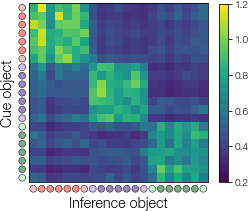

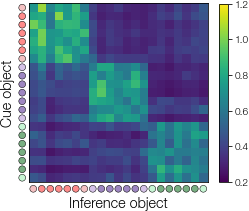

In [3]:
# re-ordered item indices for visualization
ind = np.hstack((np.arange(17, 21), np.arange(0, 17)))

# plot using best-fitting values for the two models with an SR
n = 21
model_names = ['sr-g_a10', 'sr-comm-gqw_a10']
struct_s1 = struct.query('subject == 103')
for model_name in model_names:
    # load fitted parameters
    fit_file = fig_dir / f'fit_{model_name}' / 'fit.csv'
    params = model.load_fit_params(fit_file)
    sr = model.learn_struct_sr(
        struct_s1, params['gamma'], params['alpha'], n
    )

    # plot sample SR
    fig, ax = plt.subplots(figsize=(4, 4))
    h = figures.plot_sim(
        sr[np.ix_(ind, ind)], nodes.iloc[ind], ax=ax, vmin=0.2, vmax=1.2
    )
    fig.colorbar(h, shrink=0.82)
    fig.savefig(fig_dir / f'temporal_bias_model-{model_name}_sr.pdf')

## Plot community matrix

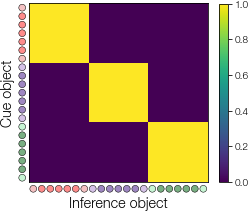

In [4]:
nodes = network.node_info()
comm = nodes['community'].to_numpy()
within_mat = (comm == comm[:, None]).astype(float)

fig, ax = plt.subplots(figsize=(4, 4))
h = figures.plot_sim(
    within_mat[np.ix_(ind, ind)], nodes.iloc[ind], ax=ax, vmin=0, vmax=1
)
fig.colorbar(h, shrink=0.82)
fig.savefig(fig_dir / 'temporal_bias_model-comm-g_within.pdf')